In [2]:
import pandas as pd
import numpy as np
df=pd.read_csv('Du_lieu_dt_4.csv')
df['Gia']=df['Gia'].replace('[*₫Giá dự kiến: .]','',regex=True)
df['Gia']=pd.to_numeric(df['Gia']).astype(int)
df=df.dropna(axis=0,how='any')


Task: Tính doanh thu của từng nhà sản xuất, vẽ biểu đồ, thương hiệu nào bán chạy nhất kể từ khi ra mắt

Product has most sales is iPhone with 41631410000 sales


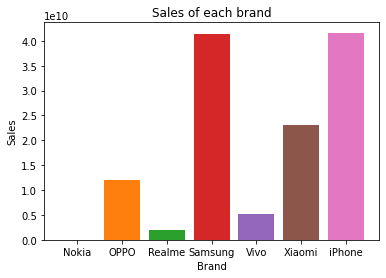

In [3]:
import numpy as np
import matplotlib.pyplot as plt
df1=df
df1['Sales']=df['Gia']*df['So Luong']
df1.head()
sale_values=df1.groupby('Brand').sum()['Sales']
sale_values
for i,y in sale_values.items():
    plt.bar(i,y)
    plt.xlabel('Brand')
    plt.ylabel('Sales')
    plt.title('Sales of each brand')
    if y==sale_values.max():
        print('Product has most sales is',i,'with',y,'sales')



Task: Tìm những chiếc điện thoại bán chạy và được đánh giá cao trong tầm giá 8 triệu đồng, trong đó điện thoại nào bán được nhiều nhất

In [70]:
df2=df
df2_tmp=df2.loc[(df2['Gia']<8000000)&(df2['Danh gia']>=4)&(df2['Gia']>5000000)]
most_brn=df2_tmp.loc[:,['Name','Brand','Gia','Danh gia','So Luong']]

most_brn.sort_values(by='So Luong',ascending=False,inplace=True)
most_brn
print(type(most_brn))



<class 'pandas.core.frame.DataFrame'>


Product has most quanity is Điện thoại OPPO A95 with 260 sales


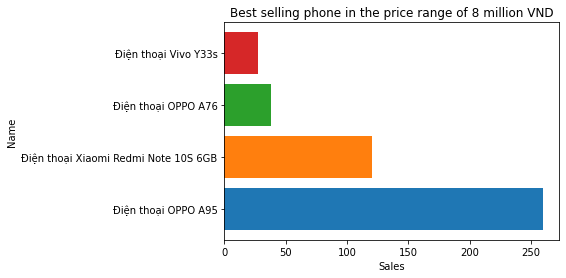

In [5]:
tm_mst=most_brn.groupby('Name').max()['So Luong'].sort_values(ascending=False)

for i, y in tm_mst.items():
    plt.barh(i,y)
    plt.ylabel('Name')
    plt.xlabel('Sales')
    plt.title('Best selling phone in the price range of 8 million VND')
    if y==tm_mst.max():
        print('Product has most quanity is',i,'with',y,'sales')

Task: Tìm những chiếc điện thoại có sử dụng chip Snapdragon, đánh giá xem những chiếc điện thoại sử dụng chip Snap có đem lại tiềm năng không?

In [6]:
def chip_snd(st1):
    st1=st1.split(' ')[0]
    return st1

In [7]:



df.head()
df3=df.loc[:,['Name','Chip','Danh gia']]
df3['Chip Sn']=df3['Chip'].apply(chip_snd)
snd_tmp=df3.loc[(df3['Chip Sn']=='Snapdragon')]
snd_tmp2=snd_tmp.groupby('Chip')
snd_tmp2_avg=snd_tmp2.mean()
snd_tmp2_avg=round(snd_tmp2_avg.reset_index(),1)
snd_tmp2_avg
    




,Chip,Danh gia
0,Snapdragon 480 8 nhân 5G,3.1
1,Snapdragon 662,4.1
2,Snapdragon 680 8 nhân,4.2
3,Snapdragon 695 5G 8 nhân,3.8
4,Snapdragon 720G,3.6
5,Snapdragon 730,3.2
6,Snapdragon 732G,3.2
7,Snapdragon 765G,3.5
8,Snapdragon 778G 5G 8 nhân,3.7
9,Snapdragon 8 Gen 1 8 nhân,4.4


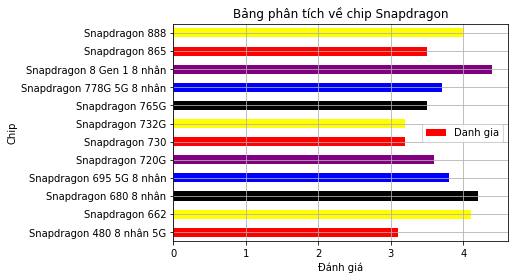

In [8]:

c = ['red', 'yellow', 'black', 'blue', 'purple']

snd_tmp2_avg.plot(x='Tên Chip',y='Đánh giá',kind='barh',color=c)
plt.title('Bảng phân tích về chip Snapdragon')
plt.xlabel('Đánh giá')
plt.grid()
plt.show()

Task: Những sản phẩm nào bán được nhiều nhất, đưa ra giả thuyết.

C:\Users\Admin\AppData\Local\Temp\ipykernel_19380\394737854.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(df4_tmp['Name'],rotation=90)


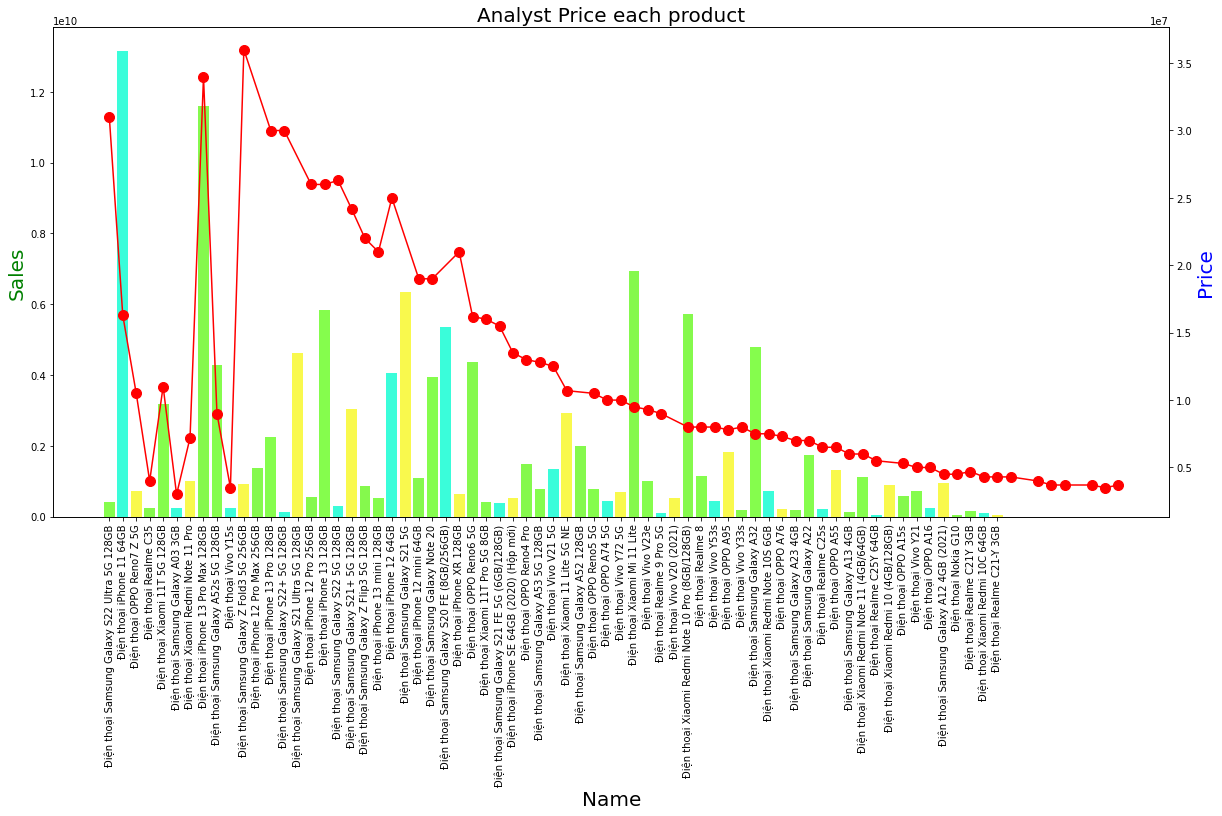

In [228]:
df4=df
df4['Sales']=df4['Gia']*df4['So Luong']
df4_tmp=df4.loc[:,['Name','Gia','Sales']]

c=['#85fd4d','#3afdda','#f9f94d','#85f94d']
plt.figure(figsize=(20,9))
ax1=plt.subplot()
ax1.bar(df4_tmp['Name'],df4_tmp['Sales'],color=c)
ax2=ax1.twinx()


ax1.set_xlabel('Name',fontsize=20)
ax2.plot(df4_tmp['Gia'],color='red',marker='.',markersize=20)
ax2.set_ylabel('Price',color='blue',fontsize=20)
ax1.set_ylabel('Sales',color='green',fontsize=20)
ax1.set_xticklabels(df4_tmp['Name'],rotation=90)
plt.title('Analyst Price each product',fontsize=20)
plt.show()

Name
Điện thoại Samsung Galaxy Z Fold3 5G 256GB      35990000
Điện thoại iPhone 13 Pro Max 128GB              33990000
Điện thoại Samsung Galaxy S22 Ultra 5G 128GB    30990000
Điện thoại iPhone 13 Pro 128GB                  29990000
Điện thoại iPhone 12 Pro Max 256GB              29990000
                                                  ...   
Điện thoại Samsung Galaxy A12 4GB (2021)         3690000
Điện thoại Nokia G10                             3690000
Điện thoại Xiaomi Redmi 10C 64GB                 3490000
Điện thoại Vivo Y15s                             3490000
Điện thoại Samsung Galaxy A03 3GB                2990000
Name: Gia, Length: 67, dtype: int32